In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py

import richio
richio.plots.use_nice_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
f = h5py.File('/home/hey4/rich_tde/data/raw/BaseTDEComptonGrayMPIR1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenterUltraLowRes/snap_49.h5')

In [136]:
# join ranks
rho = np.concatenate([f[f'rank{i}/Density'] for i in range(16)])
x = np.concatenate([f[f'rank{i}/X'] for i in range(16)])
y = np.concatenate([f[f'rank{i}/Y'] for i in range(16)])
z = np.concatenate([f[f'rank{i}/Z'] for i in range(16)])
star = np.concatenate([f[f'rank{i}/tracers/Star'] for i in range(16)])

In [137]:
f['Time'][:]

array([0.18801988])

In [ ]:
filter = np.abs(star - 1) > 1e-3
rho[~filter] = 0

In [139]:
idsort = np.argsort(x)
x = x[idsort]
y = y[idsort]
z = z[idsort]
rho = rho[idsort]

/tmp/ipykernel_351005/368266850.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=x[slice], y=y[slice], c=np.log10(rho[slice]), s=0.0001)


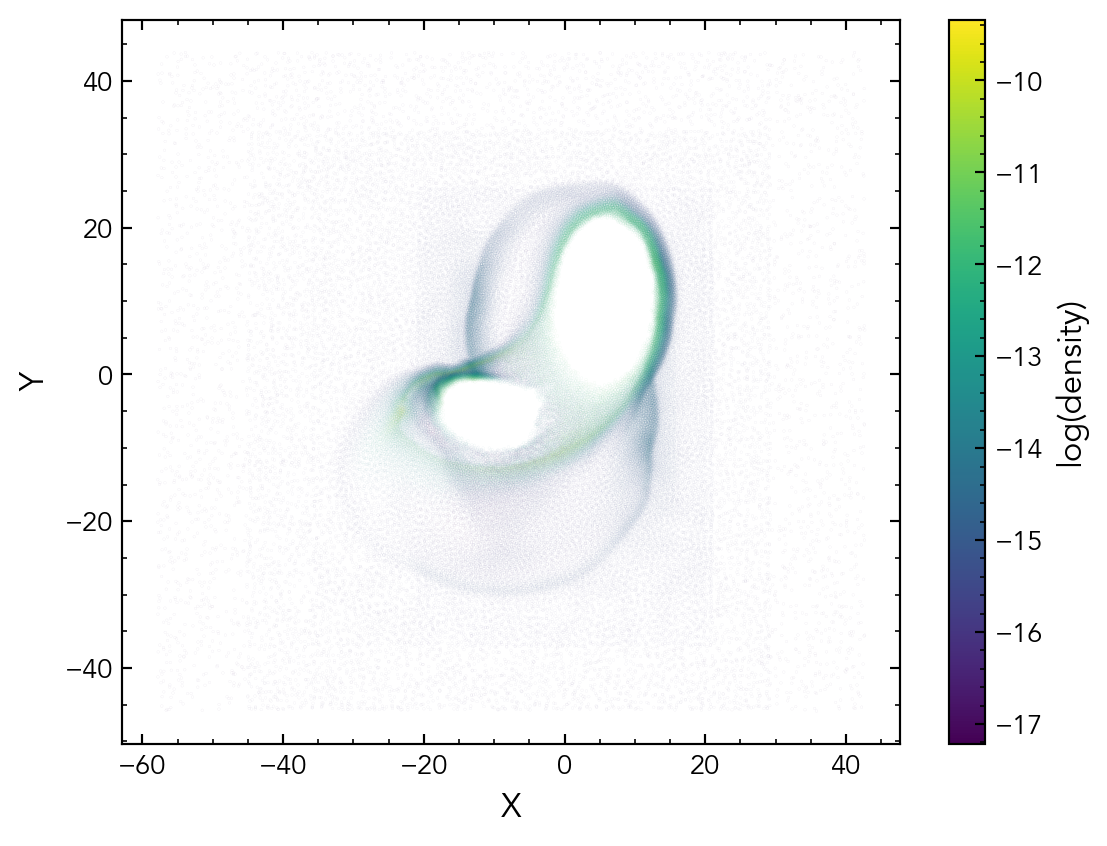

In [140]:
import matplotlib.pyplot as plt
# rho = f['rank5/Density'][:]
# x = f['rank5/X'][:]
# y = f['rank5/Y'][:]
slice = (z < 3) & (z > -3)
plt.scatter(x=x[slice], y=y[slice], c=np.log10(rho[slice]), s=0.0001)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='log(density)')
plt.show()

/tmp/ipykernel_351005/2203324846.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=x, y=y, c=np.log10(rho), s=0.0001)


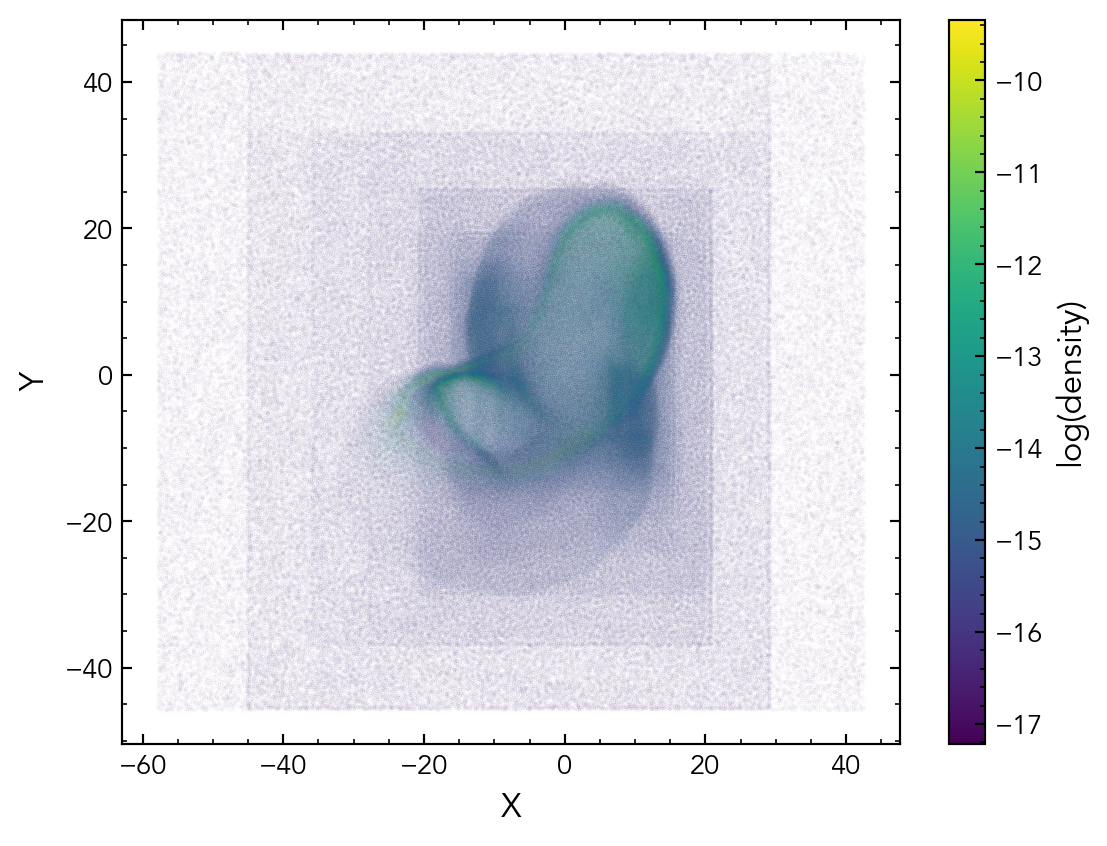

In [141]:
plt.scatter(x=x, y=y, c=np.log10(rho), s=0.0001)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='log(density)')
plt.show()

/tmp/ipykernel_351005/4041449973.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=x, y=z, c=np.log10(rho), s=0.0001)


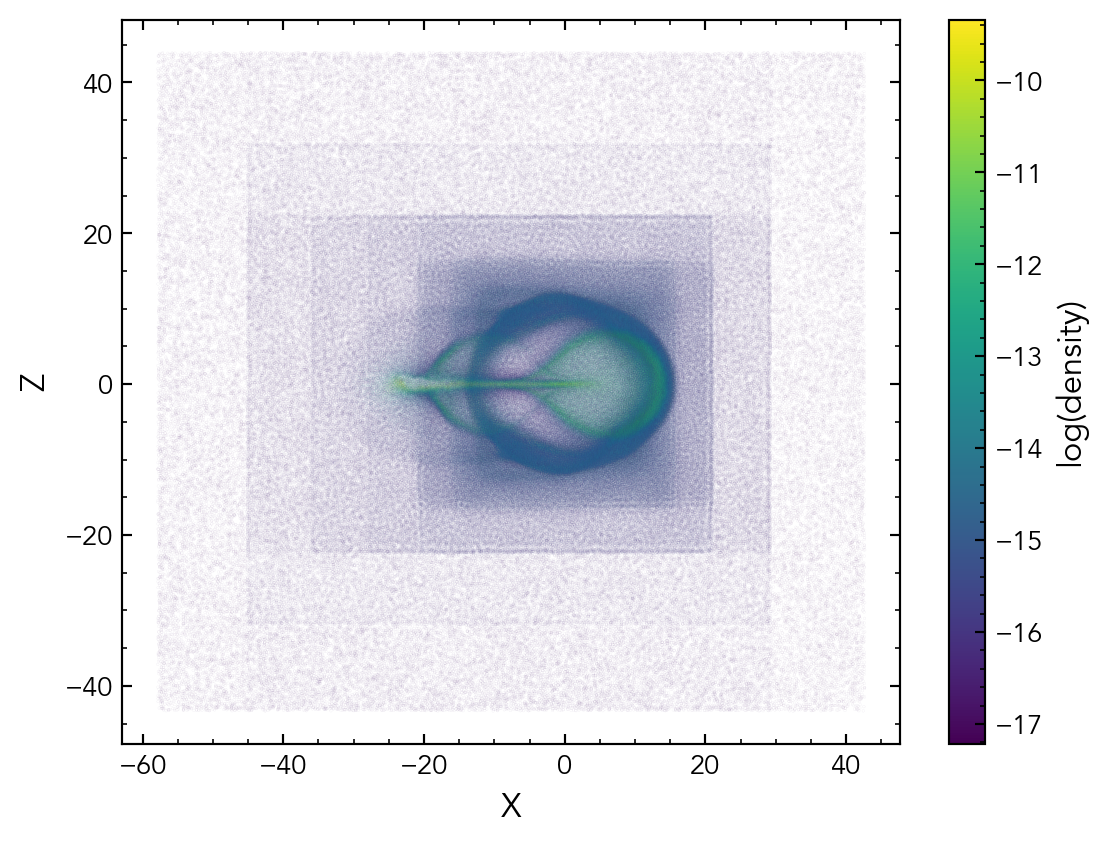

In [142]:
plt.scatter(x=x, y=z, c=np.log10(rho), s=0.0001)
plt.xlabel('X')
plt.ylabel('Z')
plt.colorbar(label='log(density)')
plt.show()

/tmp/ipykernel_351005/3067702119.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=y, y=z, c=np.log10(rho), s=0.0001)


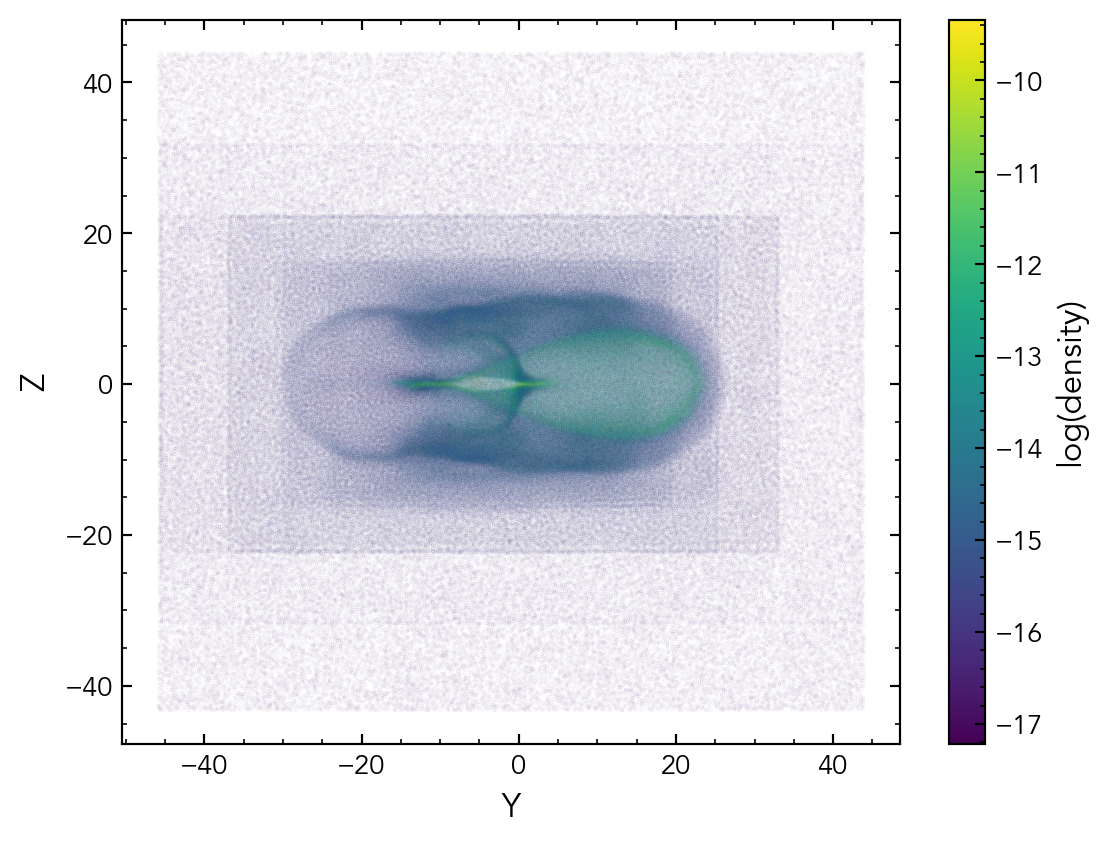

In [143]:
plt.scatter(x=y, y=z, c=np.log10(rho), s=0.0001)
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar(label='log(density)')
plt.show()